In [32]:
import os
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
os.chdir(parent_dir)

import numpy as np
import matplotlib.pyplot as plt

from src.skygraph import SkyGraph
from src.skygraph import SkyAgent, LinearSkyAgent
from src.skygraph import SkyModel
from src.skygraph.model import LOGGER

from src.skygraph.agents.utils import test_agents

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Linear model vs uniform default model

* перебираем вероятность остаться, если она большая, то пробок быть почти не должно

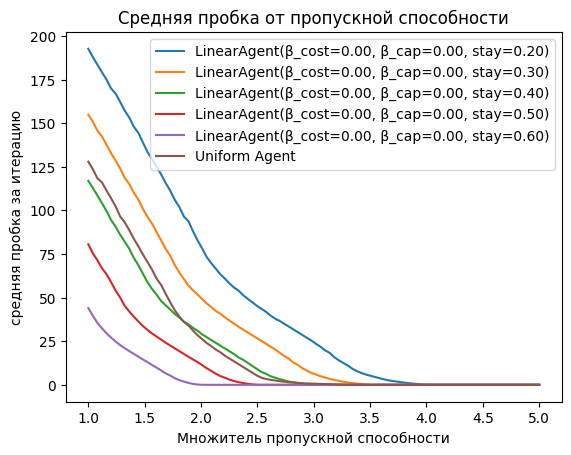

In [28]:
agents = [
    LinearSkyAgent(5 , beta_cost = 0.0 , beta_capacity = 0, stay_prob=p) 
    for p in np.arange(0.2,0.7,0.1)
]
agents.append(SkyAgent(5))

test_agents(agents)

## Отладка
* При нулевых весах и вероятностью остаться, как у uniform модели на дефолтном графе, должны получиться одинаковые политики

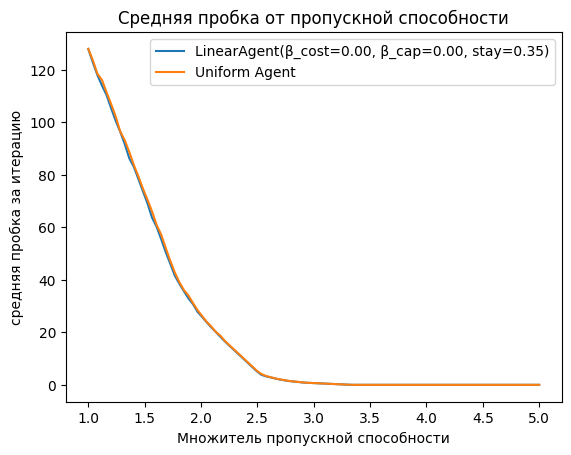

In [34]:
# stay_prob of default model in graph._default()
stay_prob = [0.5, 1.0/3, 1.0/3, 0.25, 1.0/3]

agents = [
    LinearSkyAgent(5 , beta_cost = 0.0 , beta_capacity = 0, stay_prob = stay_prob ) ,
    SkyAgent(5)
]
test_agents(agents)

# Перебор весов при capacity

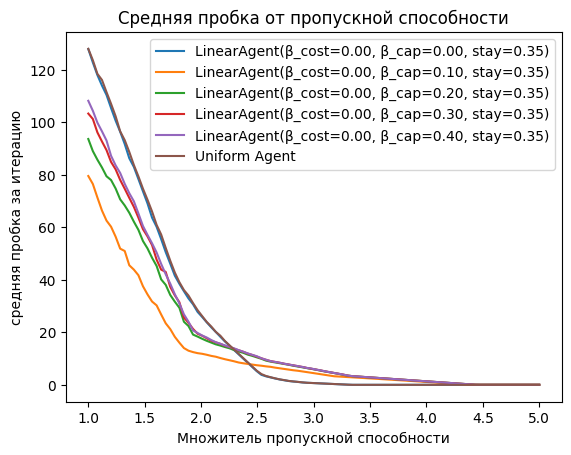

In [37]:
# stay_prob of default model in graph._default()
stay_prob = [0.5, 1.0/3, 1.0/3, 0.25, 1.0/3]

agents = [
    LinearSkyAgent(5 , beta_cost = 0.0 , beta_capacity = p, stay_prob = stay_prob ) 
    for p in np.arange(0,0.5,0.1)
]
agents.append(SkyAgent(5))

test_agents(agents)

# Итог:
* При плохой пропускной способности любая стратегия из класса **LinearAgent** связанная с учетом пропускной способности лучше равномерной, в случае, когда совпадают диагональные элементы политик (вероятности остаться в вершине совпадают)